Neste projeto, exploraremos dados publicamente disponíveis do LendingClub.com. O Lending Club conecta pessoas que precisam de dinheiro (tomadores de empréstimos) com pessoas que têm dinheiro (investidores). Como investidor, você provavelmente desejará investir em pessoas que demonstrem um perfil com alta probabilidade de pagar de volta. Tentaremos criar um modelo que ajudará a prever isso.

O Lending Club teve um ano muito interessante em 2016, então vamos analisar alguns dos seus dados mantendo esse contexto em mente. Esses dados são de antes mesmo deles se tornarem públicos.

Usaremos dados de empréstimos de 2007 a 2010 e tentaremos classificar e prever se o tomador de empréstimo pagou o empréstimo na íntegra. Você pode baixar os dados aqui ou simplesmente usar o arquivo CSV já fornecido. Recomenda-se usar o CSV fornecido, pois ele foi limpo de valores ausentes.



# Data Dictionary 

<b>credit.policy:</b> 1 se o cliente atender aos critérios de avaliação de crédito do LendingClub.com e 0 caso contrário.

<b>purpose:</b> O objetivo do empréstimo (assume valores como "cartão de crédito", "consolidação de dívidas", "educacional", "compra grande", "pequeno negócio" e "outros").

<b>int.rate:</b> A taxa de juros do empréstimo, como uma proporção (uma taxa de 11% seria armazenada como 0.11). Os tomadores de empréstimos julgados pelo LendingClub.com como mais arriscados recebem taxas de juros mais altas.

<b>installment:</b> As parcelas mensais devidas pelo tomador de empréstimo se o empréstimo for financiado.

<b>log.annual.inc:</b> O log natural da renda anual auto-relatada do tomador de empréstimo.

<b>dti:</b> A relação dívida-renda do tomador de empréstimo (quantia da dívida dividida pela renda anual).

<b>fico:</b> A pontuação de crédito FICO do tomador de empréstimo.

<b>days.with.cr.line:</b> O número de dias que o tomador de empréstimo teve uma linha de crédito.

<b>revol.bal:</b> O saldo rotativo do tomador de empréstimo (quantia não paga no final do ciclo de faturamento do cartão de crédito).

<b>revol.util:</b> A taxa de utilização da linha rotativa do tomador de empréstimo (a quantia da linha de crédito usada em relação ao crédito total disponível).

<b>inq.last.6mths</b>: O número de consultas do tomador de empréstimo por credores nos últimos 6 meses.

<b>delinq.2yrs:</b> O número de vezes que o tomador de empréstimo ficou mais de 30 dias atrasado no pagamento nos últimos 2 anos.

<b>pub.rec:</b> O número de registros públicos prejudiciais do tomador de empréstimo (falências, penhoras fiscais ou sentenças).

# Etapas: 
1. Entendimento dos Dados;
2. Tratamento dos Dados;
3. Análise Exploratória de Dados;
4. Padronização e divisão dos dados em Treino e Teste;
5. Modelagem dos Algorítmos de Decision Tree, Random Forest;
6. Encontrando o melhor modelo: Tunagem de Hiperparâmetros com GridSearch;
7. Conclusões.

# 1. Entendimento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objects as go
#import plotly.express as px
import scipy.stats as stats

#import warnings
#warnings.filterwarnings('ignore')

# Configurando objetos Pandas DataFrame e Numpy Arrays para exibirem todas as informações
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurando estilo e paleta de cores que serão utilizadas nos gráficos
sns.set_theme(style="white", palette="viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Estatísticas Descritivas

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Verificando Valores Nulos

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

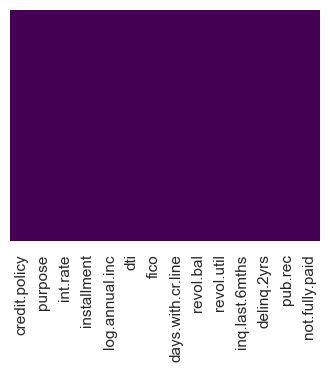

In [6]:
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df.isnull().sum()

## Verificando Valores Infinitos
- Valores como -inf ou +inf podem existir na base.

In [7]:
np.isinf(df.select_dtypes(include=['number'])).sum()

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
display(df.duplicated().sum())
df[df.duplicated()]

0

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


# 3. Análise Exploratória de Dados

In [9]:
df.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [10]:
#sns.pairplot(data=df, hue='not.fully.paid', palette='viridis')

Maiores Correlações:
1: revol.util - int.rate: 0.4648372794943528
2: log.annual.inc - installment: 0.4481021536896286
3: log.annual.inc - revol.bal: 0.3721396025183462
4: fico - credit.policy: 0.3483186831191337
5: revol.util - dti: 0.33710917923817196
6: days.with.cr.line - log.annual.inc: 0.33689638927554105
7: int.rate - installment: 0.27614017564338034
8: days.with.cr.line - fico: 0.26387974860985536
9: revol.bal - installment: 0.23362540011160632
10: revol.bal - days.with.cr.line: 0.22934415673595906

Menores Correlações:
1: fico - int.rate: -0.7148207714193544
2: fico - revol.util: -0.5412893350075594
3: credit.policy - inq.last.6mths: -0.535511179331188
4: credit.policy - int.rate: -0.29408908922610627
5: dti - fico: -0.2411909851083515
6: fico - delinq.2yrs: -0.21633953002304074
7: credit.policy - revol.bal: -0.18751847900734214
8: inq.last.6mths - fico: -0.18529298773445543
9: not.fully.paid - credit.policy: -0.1581191503140471
10: fico - not.fully.paid: -0.1496663030748367


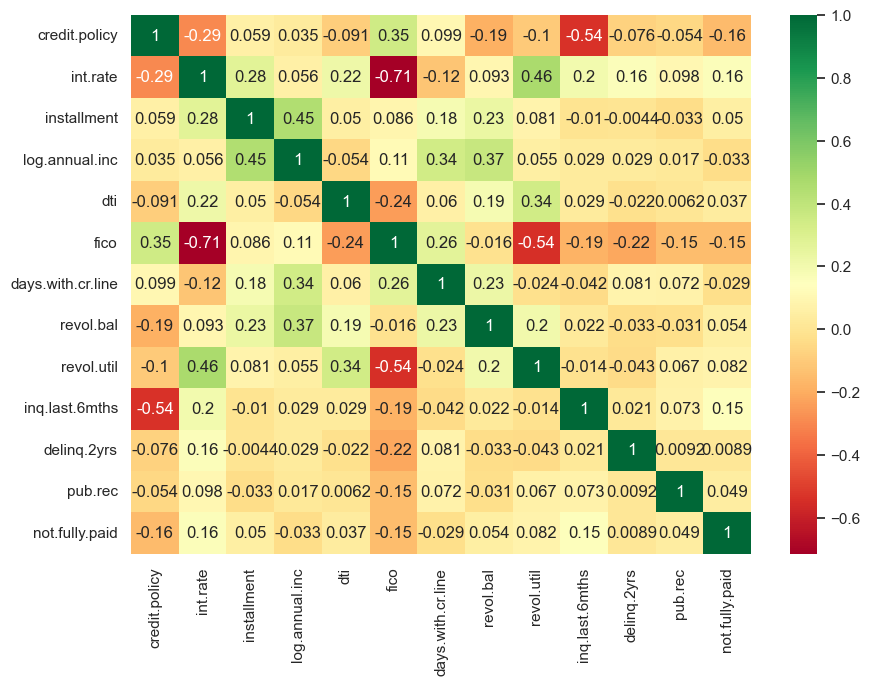

In [11]:
def print_top_correlations(df):
    correlation_matrix = df.corr(numeric_only=True)

    plt.figure(figsize=(10,7))
    sns.heatmap(data=correlation_matrix,
                annot=True,
                cmap='RdYlGn')

    top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

    # Pegue as 10 maiores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].head(10)
    count = 0
    print('Maiores Correlações:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

    # Pegue as 10 menores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].tail(10)
    top_10_correlations.sort_values(ascending=True,inplace=True)
    count = 0
    print(f'\nMenores Correlações:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

print_top_correlations(df)

Text(0, 0.5, 'Frequência')

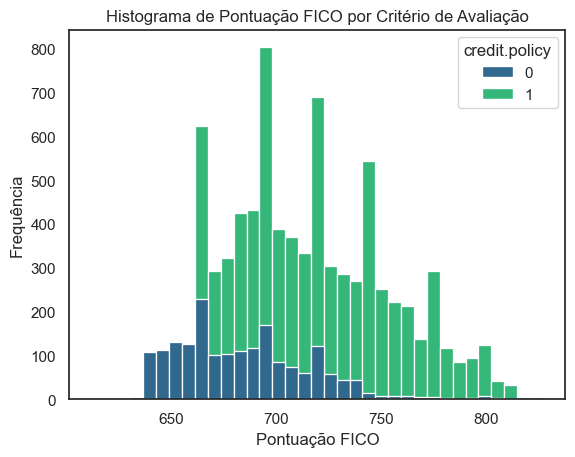

In [12]:
sns.histplot(data=df,
             x='fico',
             bins=35,
             hue='credit.policy',
             palette='viridis',
             alpha=1)
plt.title('Histograma de Pontuação FICO por Critério de Avaliação')
plt.xlabel('Pontuação FICO')
plt.ylabel('Frequência')

Nesta visualização fica claro que pessoas com a pontuação fico  abaixo de 650 não atendem aos critéros de avaliação.

Text(0, 0.5, 'Frequência')

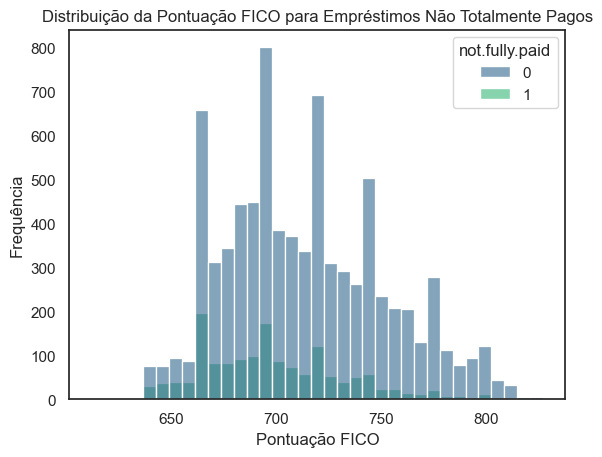

In [13]:
sns.histplot(data=df,
             x='fico',
             bins=35,
             hue='not.fully.paid',
             palette='viridis',
             alpha=0.6)
plt.title('Distribuição da Pontuação FICO para Empréstimos Não Totalmente Pagos')
plt.xlabel('Pontuação FICO')
plt.ylabel('Frequência')

In [14]:
df.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


In [15]:
df['fico_group'] = pd.cut(df['fico'], [i for i in range(600,875,25)]) # dividindo os dados em grupos de pontuações
df['fico_group_str'] = df['fico_group'].astype(str)  # Converte os intervalos para strings

# Criando um DataFrame para contar as ocorrências de cada grupo e a condição de pagamento
grouped = df.groupby(['fico_group_str', 'not.fully.paid']).size().reset_index(name='count')

In [16]:
print(grouped)

   fico_group_str  not.fully.paid  count
0      (600, 625]               0      3
1      (600, 625]               1      1
2      (625, 650]               0    154
3      (625, 650]               1     73
4      (650, 675]               0   1151
5      (650, 675]               1    354
6      (675, 700]               0   2039
7      (675, 700]               1    446
8      (700, 725]               0   1786
9      (700, 725]               1    337
10     (725, 750]               0   1366
11     (725, 750]               1    198
12     (750, 775]               0    923
13     (750, 775]               1     86
14     (775, 800]               0    488
15     (775, 800]               1     28
16     (800, 825]               0    134
17     (800, 825]               1     10
18     (825, 850]               0      1


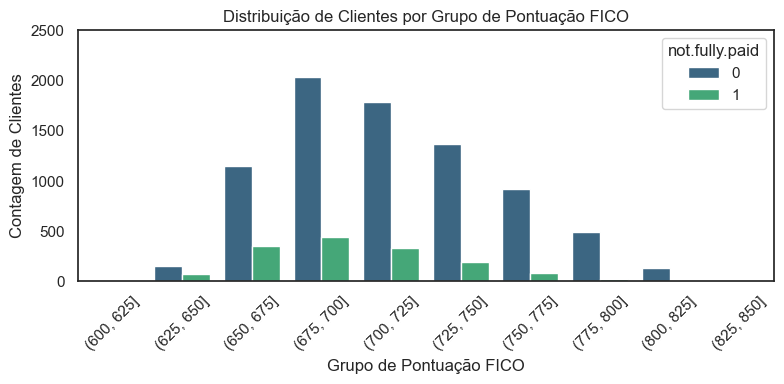

In [17]:
# Criando o gráfico
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped, x='fico_group_str', y='count', hue='not.fully.paid', palette='viridis')

plt.title('Distribuição de Clientes por Grupo de Pontuação FICO')
plt.xlabel('Grupo de Pontuação FICO')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45)
plt.ylim(0, 2500)  # Ajuste manual do limite do eixo Y
plt.tight_layout()
plt.show()

In [18]:
df.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fico_group,fico_group_str
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,"(725, 750]","(725, 750]"


Podemos perceber que esta visualização é bastante similar a anterior, é possível também notar certos picos onde a frequência aumenta significativamente e isso dá a maneira em que a pontuação FICO funciona.

### Frequência dos propósitos dos empréstimos para empréstimos não totalmente pagos

not.fully.paid  purpose           
0               all_other             1944
                credit_card           1116
                debt_consolidation    3354
                educational            274
                home_improvement       522
                major_purchase         388
                small_business         447
1               all_other              387
                credit_card            146
                debt_consolidation     603
                educational             69
                home_improvement       107
                major_purchase          49
                small_business         172
dtype: int64

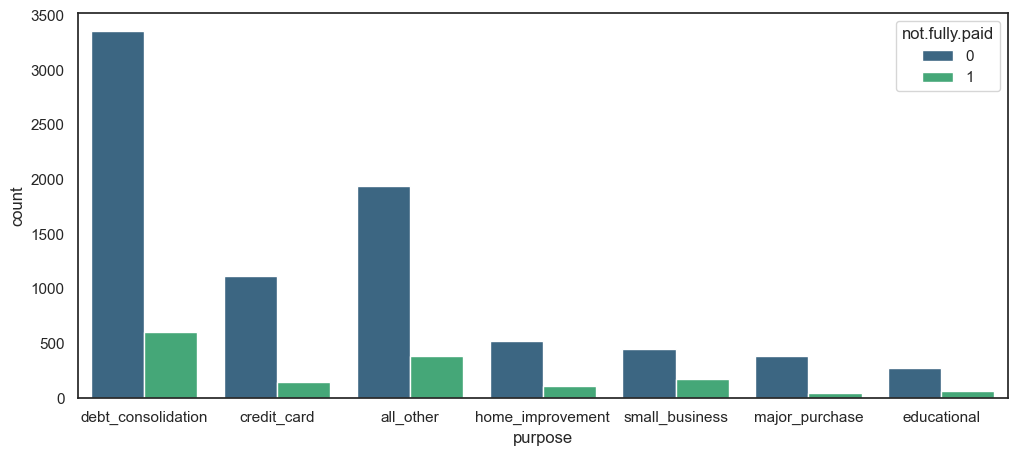

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,
              x='purpose', # countplot é utilizado para contagens de variáveis categóricas
              hue='not.fully.paid',
              palette='viridis')

# Contando os valores por categoria 'not.fully.paid' e 'purpose'
counts = df.groupby(['not.fully.paid', 'purpose']).size()
counts

Nesta visualização é possível entender que o pagamento de débitos 'debit_consolidation' é a mais popular razão para pedir empréstimos

In [20]:
df.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fico_group,fico_group_str
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,"(725, 750]","(725, 750]"


## Correlação entre a Pontuação FICO e a taxa de juros

Pearson correlation: -0.71, p-value: 0


<Figure size 600x300 with 0 Axes>

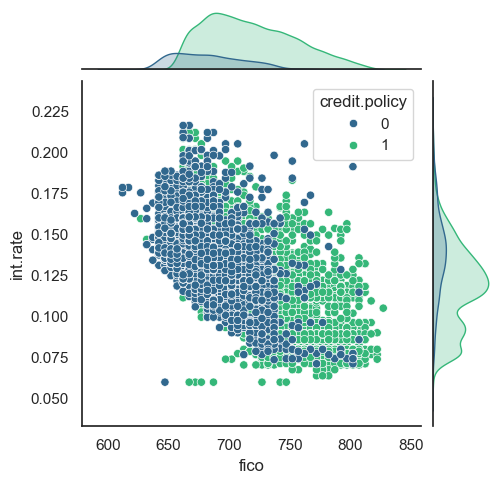

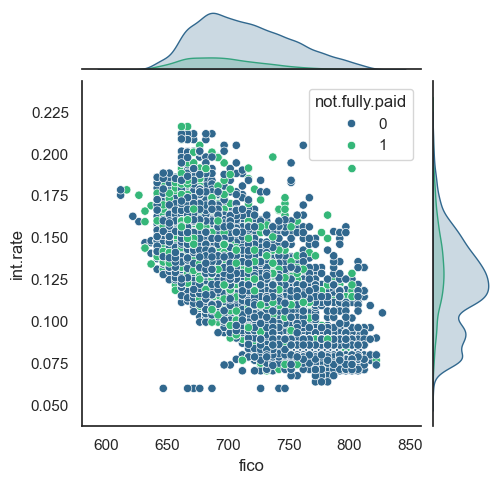

In [21]:
from scipy.stats import pearsonr
plt.figure(figsize=(6,3))

sns.jointplot(data=df, x='fico', y='int.rate', hue='credit.policy', palette='viridis', height=5)
sns.jointplot(data=df, x='fico', y='int.rate', hue='not.fully.paid', palette='viridis', height=5)

# Calcula a correlação de Pearson e o p-value
correlation, p_value = pearsonr(df['fico'], df['int.rate'])
print(f"Pearson correlation: {correlation:.2f}, p-value: {p_value:.2g}")

Fica claro o fato de que usuários com maior pontuação FICO tem melhor crédito e menores taxas de juros, usuários com menor pontuação fico tem menor crédito e maiores taxas a serem pagas pela suspeita de não conseguir pagar.

## Linear model plot

<Figure size 500x300 with 0 Axes>

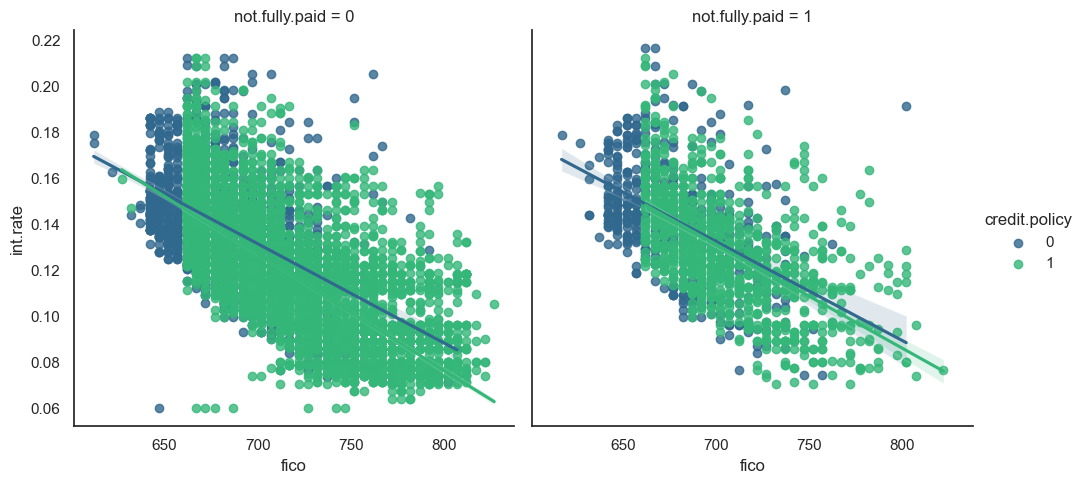

In [22]:
plt.figure(figsize=(5,3))
sns.lmplot(data=df, x='fico', y='int.rate',hue='credit.policy', col='not.fully.paid', palette='viridis')

Foi possível observar certa similaridade no comportamento dos clientes que pagam e não pagam os empréstimos e também na forma em que recebem ou não o critério de avaliação

# 4. Preparação dos dados para o algorítmo e divisão dos dados em Treino e Teste

### Transformando a variável categórica 'purpose' em uma 'dummy variable' para que o algorítmo seja capaz de interpretá-la

In [23]:
categorical_feats = ['purpose']

final_data = pd.get_dummies(data=df,columns=categorical_feats)

In [24]:
display(final_data.head(1))
final_data.info()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fico_group,fico_group_str,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,"(725, 750]","(725, 750]",False,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   credit.policy               9578 non-null   int64   
 1   int.rate                    9578 non-null   float64 
 2   installment                 9578 non-null   float64 
 3   log.annual.inc              9578 non-null   float64 
 4   dti                         9578 non-null   float64 
 5   fico                        9578 non-null   int64   
 6   days.with.cr.line           9578 non-null   float64 
 7   revol.bal                   9578 non-null   int64   
 8   revol.util                  9578 non-null   float64 
 9   inq.last.6mths              9578 non-null   int64   
 10  delinq.2yrs                 9578 non-null   int64   
 11  pub.rec                     9578 non-null   int64   
 12  not.fully.paid              9578 non-null   int64   
 13  fico_group        

### Divisão em Treino e Teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Variáveis independentes/features
X = final_data.drop(labels=['not.fully.paid','fico_group','fico_group_str'], axis=1)

# Variável dependente/true label
y = final_data['not.fully.paid']

# Criando dados para treino e teste do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 4845 to 1547
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               6704 non-null   int64  
 1   int.rate                    6704 non-null   float64
 2   installment                 6704 non-null   float64
 3   log.annual.inc              6704 non-null   float64
 4   dti                         6704 non-null   float64
 5   fico                        6704 non-null   int64  
 6   days.with.cr.line           6704 non-null   float64
 7   revol.bal                   6704 non-null   int64  
 8   revol.util                  6704 non-null   float64
 9   inq.last.6mths              6704 non-null   int64  
 10  delinq.2yrs                 6704 non-null   int64  
 11  pub.rec                     6704 non-null   int64  
 12  purpose_all_other           6704 non-null   bool   
 13  purpose_credit_card         6704 no

# 5. Modelagem dos Algorítmos de Árvore de Decisão (Decision Tree) e Random Forest

## 5.1 - Árvore de Decisão

In [28]:
from sklearn.tree import DecisionTreeClassifier

### Criando uma instância do modelo

In [29]:
dtree = DecisionTreeClassifier()

### Ajustando o modelo as features e rótulos de treino

In [30]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Criando as predições

In [31]:
dtree_predictions = dtree.predict(X_test) # passando as features de teste para a criação das predições

# Visualizando algumas predições
dtree_predictions[1:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

### Sumários e Métricas - Decision Tree

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2431
           1       0.19      0.25      0.22       443

    accuracy                           0.72      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.72      0.74      2874



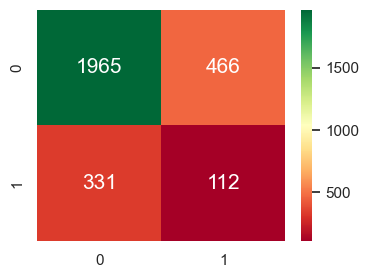

In [33]:
matriz_confusao = confusion_matrix(y_test,dtree_predictions)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao,
            annot=True,
            fmt='d', # números formatados sem notação cientifica, senão ficaria por exemplo '1.5e+02'
            cmap='RdYlGn',
            annot_kws={'fontsize': 15})

# O classification report recebe os rótulos verdadeiros e as predições para comparação
print(classification_report(y_test,dtree_predictions))

### Matriz de Confusão:
- Verdadeiros Positivos (TP): 1974 casos corretamente identificados como clientes que não pagaram totalmente.
- Verdadeiros Negativos (TN): 105 casos corretamente identificados como clientes que pagaram o empréstimo.
- Falsos Positivos (FP): 338 casos erroneamente classificados como clientes que não pagaram totalmente (falsos alarmes).
- Falsos Negativos (FN): 457 casos erroneamente classificados como clientes que pagaram o empréstimo (clientes que não pagaram, mas o modelo os classificou como pagadores).

### Classification Report:
- Precision: A precisão para a classe 0 (clientes que pagaram o empréstimo) é de 85%, o que significa que 85% dos casos previstos como pagadores realmente o são. Já para a classe 1 (clientes que não pagaram totalmente o empréstimo), a precisão é de apenas 19%, indicando que o modelo tem dificuldade em identificar corretamente esses casos.
- Recall: A revocação (recall) para a classe 0 é de 81%, o que significa que o modelo identifica corretamente 81% dos casos de clientes que pagaram o empréstimo. Para a classe 1, o recall é de 24%, indicando que o modelo identifica apenas 24% dos casos de clientes que não pagaram totalmente.
- F1-score: O F1-score, que é uma média harmônica entre precisão e recall, é de 0.83 para a classe 0 e apenas 0.21 para a classe 1. Isso mostra que o modelo tem um desempenho muito melhor na classificação dos clientes que pagaram o empréstimo do que naqueles que não pagaram.
- Accuracy: A acurácia geral do modelo é de 72%, o que parece razoável à primeira vista. No entanto, considerando que a classe 0 (clientes que pagaram) é muito mais comum do que a classe 1 (clientes que não pagaram totalmente), a acurácia pode estar enviesada pelo desempenho melhor na classe majoritária.

## 5.2 Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Instanciando o modelo
rf_classifier = RandomForestClassifier(n_estimators=300) # 300 árvores serão criadas

In [36]:
# Ajustando o modelo aos dados de treino
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [37]:
# Criando predições com os dados de teste
rf_predictions = rf_classifier.predict(X_test)

### Sumários e Métricas - Random Forest

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.67      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.76      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



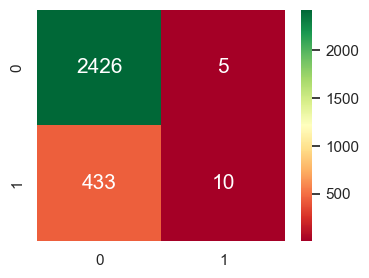

In [38]:
matriz_confusao = confusion_matrix(y_test,rf_predictions)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao,
            annot=True,
            fmt='d', # números formatados sem notação cientifica, senão ficaria por exemplo '1.5e+02'
            cmap='RdYlGn',
            annot_kws={'fontsize': 15})

# O classification report recebe os rótulos verdadeiros e as predições para comparação
print(classification_report(y_test,rf_predictions))

### Matriz de Confusão

- Verdadeiros Positivos (TP): Apenas 13 casos corretamente identificados como clientes que não pagaram totalmente.
- Verdadeiros Negativos (TN): 2423 casos corretamente identificados como clientes que pagaram o empréstimo.
- Falsos Positivos (FP): 8 casos erroneamente classificados como clientes que não pagaram totalmente (falsos alarmes).
- Falsos Negativos (FN): 430 casos erroneamente classificados como clientes que pagaram o empréstimo (clientes que não pagaram, mas o modelo os classificou como pagadores).

### Classification Report:

- Precision: A precisão para a classe 0 (clientes que pagaram o empréstimo) é alta, 85%, indicando que a maioria dos casos previstos como pagadores realmente o são. No entanto, para a classe 1 (clientes que não pagaram totalmente o empréstimo), a precisão é baixa, apenas 62%, sugerindo que o modelo tem dificuldade em identificar corretamente esses casos.
- Recall: O recall para a classe 0 é excelente, 100%, indicando que o modelo identifica corretamente todos os casos de clientes que pagaram o empréstimo. Por outro lado, o recall para a classe 1 é muito baixo, apenas 3%, o que significa que o modelo identifica apenas uma pequena parte dos casos de clientes que não pagaram totalmente.
- F1-score: O F1-score para a classe 0 é alto, 0.92, refletindo um bom equilíbrio entre precisão e recall. No entanto, para a classe 1, o F1-score é muito baixo, apenas 0.06, mostrando que o modelo tem um desempenho muito fraco na identificação de clientes inadimplentes.
- Accuracy: A acurácia geral do modelo é alta, 85%. No entanto, como discutido anteriormente, essa alta acurácia é influenciada pelo desempenho muito superior na classe majoritária (clientes que pagaram).


## Conclusão Random Forest:

O Random Forest mostra um desempenho muito bom na identificação de clientes que pagaram seus empréstimos, com alta precisão, recall e F1-score para essa classe. No entanto, o desempenho na identificação de clientes que não pagaram totalmente é extremamente fraco, com uma precisão, recall e F1-score muito baixos.

Isso indica que o modelo está superajustado para a classe majoritária, o que é comum em conjuntos de dados desbalanceados como esse, onde há muito mais clientes pagadores do que inadimplentes. Técnicas de balanceamento de dados, como oversampling da classe minoritária, ajustar hiperparâmetros do modelo podem ser utilizadas para melhorar o desempenho do modelo.

# Otimização de Parâmetros com Grid Search para o Random Forest Classifier

Será aplicada a técnica de otimização de parâmetros Grid Search em conjunto com o algoritmo Random Forest Classifier. A otimização de parâmetros é uma etapa importante no processo de desenvolvimento de modelos de machine learning, pois nos permite encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.

O Grid Search é uma técnica que nos permite testar diferentes valores para múltiplos hiperparâmetros de forma sistemática, ajudando a encontrar a melhor configuração para o nosso modelo. Neste caso, estaremos otimizando os seguintes parâmetros do Random Forest Classifier:

- Número de árvores na floresta (n_estimators)
- Profundidade máxima de cada árvore (max_depth)
- Número mínimo de amostras necessárias para dividir um nó interno (min_samples_split)
- Número mínimo de amostras em um nó folha (min_samples_leaf)

Utilizaremos um conjunto de dados de treinamento para treinar diferentes modelos com combinações de valores para esses parâmetros e selecionaremos aquele que apresentar o melhor desempenho de acordo com a métrica de acurácia.

# Otimização de Parâmetros com Grid Search para o Random Forest Classifier

Será aplicada a técnica de otimização de parâmetros conhecida como Grid Search em conjunto com o algoritmo Random Forest Classifier. A otimização de parâmetros é uma etapa crucial no desenvolvimento de modelos de machine learning, pois permite identificar a combinação de hiperparâmetros que maximiza o desempenho do modelo.

O Grid Search é um método exaustivo que testa combinações de vários hiperparâmetros de forma sistemática. Para o Random Forest, estamos interessados em otimizar os seguintes parâmetros:
- **n_estimators**: Número de árvores na floresta.
- **max_depth**: Profundidade máxima de cada árvore.
- **min_samples_split**: Número mínimo de amostras necessárias para dividir um nó interno.
- **min_samples_leaf**: Número mínimo de amostras em um nó folha.

Além desses hiperparâmetros, é essencial considerar o desbalanceamento das classes presentes no conjunto de dados. Conjuntos de dados desbalanceados podem levar a modelos com uma alta acurácia, mas que falham em generalizar bem para a classe minoritária. Para mitigar esse problema, utilizamos o parâmetro `class_weight='balanced'` no Random Forest. Este parâmetro ajusta os pesos das classes de forma inversamente proporcional às frequências das classes no conjunto de dados de treinamento. Ao fazer isso, aumentamos a importância da classe minoritária durante o treinamento, melhorando o desempenho do modelo nessas instâncias.

Utilizaremos um conjunto de dados de treinamento para ajustar vários modelos com diferentes combinações desses hiperparâmetros. O modelo que apresentar o melhor desempenho, conforme avaliado pela acurácia e outras métricas relevantes, será selecionado. Este processo nos ajuda a assegurar que estamos desenvolvendo um modelo robusto e capaz de fazer previsões equilibradas para todas as classes.

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


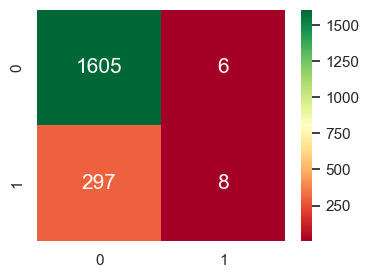

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.57      0.03      0.05       305

    accuracy                           0.84      1916
   macro avg       0.71      0.51      0.48      1916
weighted avg       0.80      0.84      0.78      1916

Melhores parâmetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que X e y são seus dados de características e rótulo, respectivamented
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciando o modelo com balanceamento de classe
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Definindo a grade de hiperparâmetros a serem testados
param_grid = {'n_estimators': [i for i in range(100,1000,100)],  # número de árvores na floresta
              'max_features': ['sqrt', 'log2'],  # número máximo de recursos considerados para dividir um nó
              'max_depth': [None, 10, 20, 30],  # profundidade máxima da árvore
              'min_samples_split': [i for i in range(5,50,5)],  # número mínimo de amostras necessárias para dividir um nó
              'min_samples_leaf': [1, 2, 4]}  # número mínimo de amostras necessárias em cada folha

# Criando o GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustando o GridSearchCV aos dados de treino
grid_search.fit(X_train, y_train)

# Criando predições com os dados de teste usando o melhor estimador encontrado
best_rf = grid_search.best_estimator_
rf_predictions = best_rf.predict(X_test)

# Avaliando o modelo
matriz_confusao = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='RdYlGn', annot_kws={'fontsize': 15})
plt.show()

# Mostrando o relatório de classificação
print(classification_report(y_test, rf_predictions))

# Opcional: Mostrar os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)
